In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/SIF Airplane EDA/Airplane Strikes Dataset.csv")
df

<ipython-input-2-c5281c449d83>:1: DtypeWarning: Columns (9,12,15,17) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("/content/drive/MyDrive/SIF Airplane EDA/Airplane Strikes Dataset.csv")


,Record ID,Incident Year,Incident Month,Incident Day,Operator ID,Operator,Aircraft,Aircraft Type,Aircraft Make,Aircraft Model,...,Fuselage Strike,Fuselage Damage,Landing Gear Strike,Landing Gear Damage,Tail Strike,Tail Damage,Lights Strike,Lights Damage,Other Strike,Other Damage
0,127128,1990,1,1,DAL,DELTA AIR LINES,B-757-200,A,148,26,...,0,0,0,0,1,1,0,0,0,0
1,129779,1990,1,1,HAL,HAWAIIAN AIR,DC-9,A,583,90,...,0,0,0,0,0,0,0,0,1,0
2,129780,1990,1,2,UNK,UNKNOWN,UNKNOWN,NaN,NaN,NaN,...,0,0,0,0,0,0,0,0,0,0
3,2258,1990,1,3,MIL,MILITARY,A-10A,A,345,NaN,...,0,0,0,0,0,0,0,0,0,0
4,2257,1990,1,3,MIL,MILITARY,F-16,A,561,NaN,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
174099,366091,2015,9,30,SWA,SOUTHWEST AIRLINES,B-737-700,A,148,42.0,...,0,0,0,0,0,0,0,0,0,0
174100,365902,2015,9,30,SWA,SOUTHWEST AIRLINES,B-737-700,A,148,42.0,...,0,0,0,0,0,0,0,0,0,0
174101,365903,2015,9,30,BUS,BUSINESS,CITATIONJET,A,226,49.0,...,1,1,0,0,0,0,0,0,0,0
174102,366046,2015,9,30,QXE,HORIZON AIR,DHC8 DASH 8,A,303,10.0,...,1,0,0,0,0,0,0,0,0,0


Calling the info method to gain a better understanding about the data points in this dataset and the feature columns. It seems that there are a lot of null values for features like Engine4 position, warning issued, injuries, and fatalities.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 174104 entries, 0 to 174103
Data columns (total 66 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Record ID             174104 non-null  int64  
 1   Incident Year         174104 non-null  int64  
 2   Incident Month        174104 non-null  int64  
 3   Incident Day          174104 non-null  int64  
 4   Operator ID           174104 non-null  object 
 5   Operator              174104 non-null  object 
 6   Aircraft              174104 non-null  object 
 7   Aircraft Type         133074 non-null  object 
 8   Aircraft Make         131051 non-null  object 
 9   Aircraft Model        122439 non-null  object 
 10  Aircraft Mass         127320 non-null  float64
 11  Engine Make           123434 non-null  float64
 12  Engine Model          121988 non-null  object 
 13  Engines               127342 non-null  float64
 14  Engine Type           127282 non-null  object 
 15  

Generated summary statics for numerical columns using df.describe(). It seems on average the number of engines of these airplanes was approximately 2 and the average height was 831.  

In [ ]:
df.describe()

,Record ID,Incident Year,Incident Month,Incident Day,Aircraft Mass,Engine Make,Engines,Engine2 Position,Engine4 Position,Height,...,Fuselage Strike,Fuselage Damage,Landing Gear Strike,Landing Gear Damage,Tail Strike,Tail Damage,Lights Strike,Lights Damage,Other Strike,Other Damage
count,174104.000000,174104.000000,174104.000000,174104.000000,127320.000000,123434.000000,127342.000000,118715.000000,3092.000000,103677.000000,...,174104.000000,174104.000000,174104.000000,174104.000000,174104.000000,174104.000000,174104.000000,174104.000000,174104.000000,174104.000000
mean,241204.036915,2006.036392,7.171840,15.712264,3.510611,21.306958,2.057656,2.918570,2.058538,831.032283,...,0.102703,0.004733,0.046242,0.005813,0.011235,0.004176,0.005962,0.004216,0.090727,0.008989
std,94013.682213,6.747708,2.790152,8.799405,0.873783,11.023161,0.469374,2.008204,1.441000,1803.650833,...,0.303571,0.068633,0.210010,0.076019,0.105397,0.064485,0.076983,0.064793,0.287222,0.094383
min,1000.000000,1990.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,205411.750000,2001.000000,5.000000,8.000000,3.000000,10.000000,2.000000,1.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,249102.500000,2007.000000,8.000000,16.000000,4.000000,22.000000,2.000000,1.000000,1.000000,50.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,322592.250000,2012.000000,9.000000,23.000000,4.000000,34.000000,2.000000,5.000000,4.000000,800.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,367445.000000,2015.000000,12.000000,31.000000,5.000000,92.000000,4.000000,7.000000,5.000000,31300.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


It seems the most common species of bird that struck an airplane was: unknown medium bird, unkown small bird, the mourning dove, the gull, and unknown bird. Thus, we can infer that medium sized bird species seem the most involved with these strikes.

In [ ]:
df['Species Name'].value_counts().head()

UNKNOWN MEDIUM BIRD    38531
UNKNOWN SMALL BIRD     32981
MOURNING DOVE           7653
GULL                    6580
UNKNOWN BIRD            6400
Name: Species Name, dtype: int64

This graph visualizes the above observation

<Axes: >

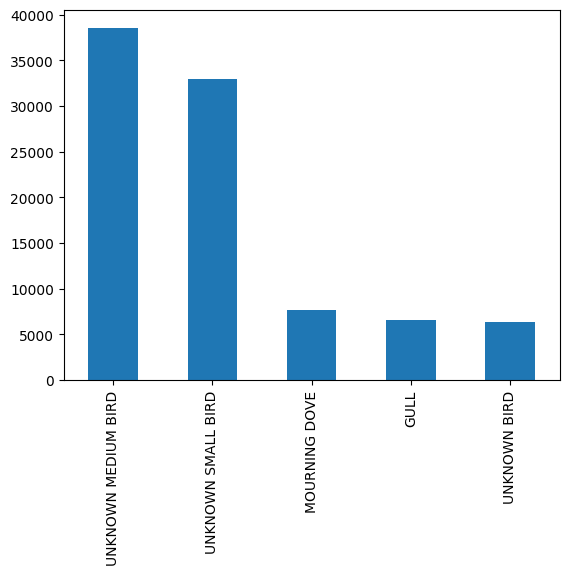

In [ ]:
df['Species Name'].value_counts().head().plot(kind = 'bar')

In [ ]:
df_2 = df[['Species Name', 'Aircraft Damage']]

In [ ]:
df_2

,Species Name,Aircraft Damage
0,GULL,1
1,HOUSE SPARROW,0
2,BARN OWL,0
3,UNKNOWN MEDIUM BIRD,0
4,FINCH,0
...,...,...
174099,UNKNOWN SMALL BIRD,0
174100,UNKNOWN SMALL BIRD,0
174101,TURKEY VULTURE,1
174102,HERMIT THRUSH,0


In [ ]:
df_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 174104 entries, 0 to 174103
Data columns (total 2 columns):
 #   Column           Non-Null Count   Dtype 
---  ------           --------------   ----- 
 0   Species Name     174024 non-null  object
 1   Aircraft Damage  174104 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 2.7+ MB


Filling in null values

In [ ]:
df_2['Species Name'].replace(np.nan, "Unknown Species", inplace = True)

<ipython-input-10-0d64620c5967>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2['Species Name'].replace(np.nan, "Unknown Species", inplace = True)


In [ ]:
df_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 174104 entries, 0 to 174103
Data columns (total 2 columns):
 #   Column           Non-Null Count   Dtype 
---  ------           --------------   ----- 
 0   Species Name     174104 non-null  object
 1   Aircraft Damage  174104 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 2.7+ MB


The below plot helps us see which bird species actually caused the most damage to airplanes during the strikes and we can once again see it is an unknown medium-sized bird. This matches with the previous plot that determined which bird species struck airplanes the most.

<Axes: >

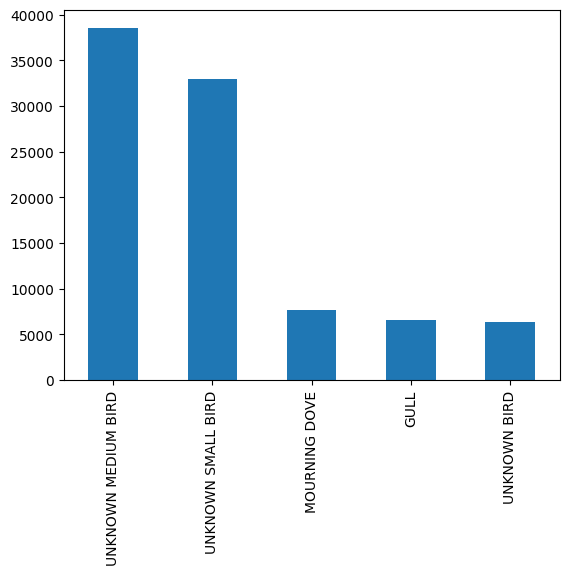

In [ ]:
df_2['Species Name'].value_counts().head().plot(kind = "bar")

The most common operators to strike wildlife that we know the name of are business, southwest airlines, united airlines, and american airlines. Of these 4, they seem to have relatively similar value counts.

<Axes: >

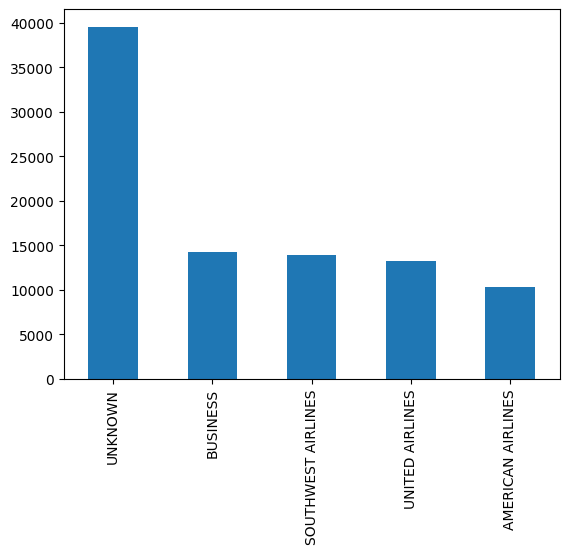

In [ ]:
df['Operator'].value_counts().head().plot(kind = 'bar')

From the below plot, we can see that every year there is an incident in the number of airplane strikes, with the peak reaching somewhere close to 2013-2014, with a dip around 2015.

<Axes: xlabel='Incident Year'>

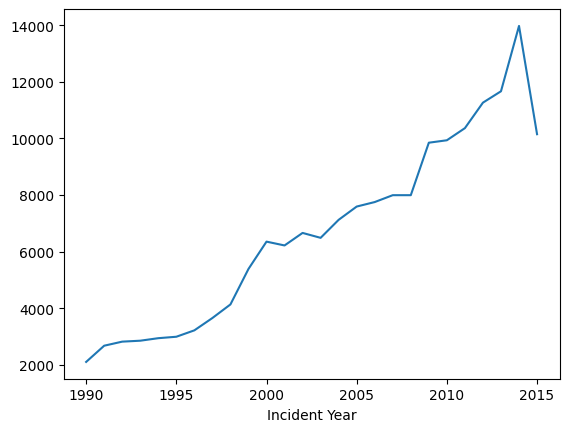

In [ ]:
df.groupby('Incident Year').size().plot()

However, there is a different trend with the incident month column, as the number of incidents increases as the months progress and reaches a peak at around month 8, and then steadily drops after month 8.

<Axes: xlabel='Incident Month'>

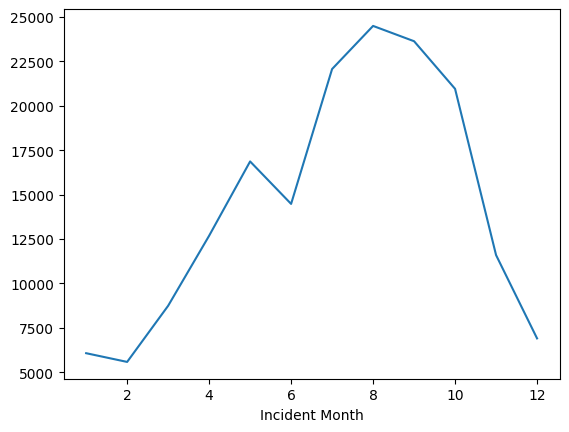

In [ ]:
df.groupby('Incident Month').size().plot()

In [ ]:
df_3 = df[['Aircraft Damage', 'Radome Strike', 'Radome Damage',
       'Windshield Strike', 'Windshield Damage', 'Nose Strike', 'Nose Damage',
       'Engine1 Strike', 'Engine1 Damage', 'Engine2 Strike', 'Engine2 Damage',
       'Engine3 Strike', 'Engine3 Damage', 'Engine4 Strike', 'Engine4 Damage',
       'Engine Ingested', 'Propeller Strike', 'Propeller Damage',
       'Wing or Rotor Strike', 'Wing or Rotor Damage', 'Fuselage Strike',
       'Fuselage Damage', 'Landing Gear Strike', 'Landing Gear Damage',
       'Tail Strike', 'Tail Damage', 'Lights Strike', 'Lights Damage',
       'Other Strike', 'Other Damage']]

df_3

,Aircraft Damage,Radome Strike,Radome Damage,Windshield Strike,Windshield Damage,Nose Strike,Nose Damage,Engine1 Strike,Engine1 Damage,Engine2 Strike,...,Fuselage Strike,Fuselage Damage,Landing Gear Strike,Landing Gear Damage,Tail Strike,Tail Damage,Lights Strike,Lights Damage,Other Strike,Other Damage
0,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,1,1,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
174099,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
174100,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
174101,1,0,0,0,0,0,0,0,0,0,...,1,1,0,0,0,0,0,0,0,0
174102,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0


No null values for the columns that specify the parts of the airplane that took damage

In [ ]:
df_3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 174104 entries, 0 to 174103
Data columns (total 30 columns):
 #   Column                Non-Null Count   Dtype
---  ------                --------------   -----
 0   Aircraft Damage       174104 non-null  int64
 1   Radome Strike         174104 non-null  int64
 2   Radome Damage         174104 non-null  int64
 3   Windshield Strike     174104 non-null  int64
 4   Windshield Damage     174104 non-null  int64
 5   Nose Strike           174104 non-null  int64
 6   Nose Damage           174104 non-null  int64
 7   Engine1 Strike        174104 non-null  int64
 8   Engine1 Damage        174104 non-null  int64
 9   Engine2 Strike        174104 non-null  int64
 10  Engine2 Damage        174104 non-null  int64
 11  Engine3 Strike        174104 non-null  int64
 12  Engine3 Damage        174104 non-null  int64
 13  Engine4 Strike        174104 non-null  int64
 14  Engine4 Damage        174104 non-null  int64
 15  Engine Ingested       174104 non-n

By using the sum() method, we can determine which airplane part was struck or damaged the most (since 1 signifies damage or strike occured, and 0 indicates otherwise). Here we can see that the airplane parts that were damaged and struck the most were the radome/nose and the windshield. This makes sense because when the airplane struck the bird, the bird likely struck the airplane at the front of the airplane.

In [ ]:
df_3.sum().head()

Aircraft Damage      14969
Radome Strike        18761
Radome Damage         1593
Windshield Strike    24189
Windshield Damage     1037
dtype: int64

The below plot visualizes the above finding. However, this plot also helps us see that for radomes and windshields, the number of strikes for that airplane part was much larger than the number of times that part actually got damaged.

<Axes: >

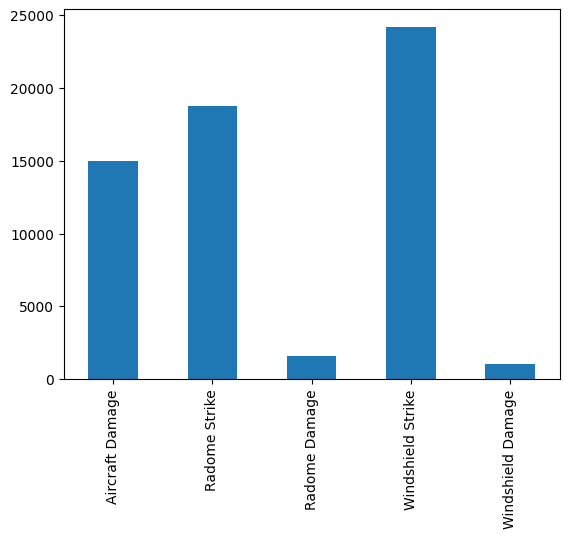

In [ ]:
df_3.sum().head().plot(kind = "bar")